# Caputo-Fabrizio model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

Set of parameters

In [5]:
L = 0.1
gamma = 0.01
gamma1 = 0.01
gamma2 = 0.05
k = 0.1
mu = 0.001
alpha = 0.12
delta = 0.001
q = 2

In [13]:
L = 10
gamma = 0.2
gamma1 = 0.2
gamma2 = 0.2
k = 0.01
mu = 0.05
alpha = 0.05
delta = 0.001
q = 2

In [2]:
L = 0.01
gamma = 0.01
gamma1 = 0.01
gamma2 = 0.05
k = 0.1
mu = 0.001
alpha = 0.12
delta = 0.001
q = 2
a = 0.001 # f_2
b = 0.001

In [3]:
print(L/mu)

10.0


$\mathcal{R}_0$ for $h_2$ and $h_1$ respectly

In [24]:
R0 = (L*k)/((mu + L*a)*(mu+gamma1 + gamma2 + alpha))
print(R0)

5.470160275696078


In [22]:
R0 = (k*(L/mu)**q)/(mu+gamma1 + gamma2 + alpha)
print(R0)

55.248618784530386


Endemic Equilibrium Point for $h_2$ and $h_1$ respectly

In [7]:
So = (mu + gamma1 + gamma2 + alpha)/(k-a*(mu + gamma1 + gamma2 + alpha))
Io = (L-mu*So)/(mu + gamma1 + alpha - (delta*gamma2)/(mu + delta))
Ro = (gamma2*Io)/(mu + delta)
print(So,Io,Ro)

1.8132820404932928 0.0772331882972331 1.9308297074308274


In [17]:
So = ((1/k)*(mu + gamma1 + gamma2 + alpha))**(1/q)
Io = (L-mu*So)/(mu + gamma1 + alpha - (delta*gamma2)/(mu + delta))
Ro = (gamma2*Io)/(mu + delta)
print(So,Io,Ro)

1.3453624047073711 0.08164752448389272 2.041188112097318


Conditions for Proposition 6

In [12]:
b1 = k*(So/(1+a*So)) - gamma1
b2 = k*(So/(1+a*So))
b3 = k*((Io*(1+a*So)-a*Io*So)/(1+a*So)**2)-(mu + gamma1 + gamma2 + alpha)

print(-mu*b3*(mu+delta) + b1*b2*(mu + delta) - b3*(mu+delta)>0)
print(-mu*b3+mu*(mu+delta) + b1*b2 - b3*(mu + delta) > 0)
print(2*mu - b3 + delta > 0)

True
True
True


In [32]:
def M(x):
        return 1. #2./(2.-x)

# Functions

def f(S,I):
        return k*I*S**q#k*S*I/(1+a*S)#k*I*S**q

def functionS(S,I,R):
        return L - mu*S - f(S,I) + gamma2*I + delta*R

def functionI(S,I,R):
        return f(S,I) -(mu + gamma1 + gamma2 + alpha)*I

def functionR(S,I,R):
        return gamma2*I - (mu + delta)*R

In [14]:
print(functionS(So,Io,Ro))
print(functionI(So,Io,Ro))
print(functionR(So,Io,Ro))

-1.3010426069826053e-18
3.469446951953614e-18
0.0




```
S = [180, 150,100]
I = [150,100,50,10]
R = [150,100,50,10]
```


```
S = [0.9, .7,.5]
I = [0.9,0.5,.09]
R = [0.9,0.5,.01]
```




In [51]:
h = 0.001

def Mf(x):
      return 2./(2.-x)

M1 = (2*(1-sigma))/float(Mf(sigma)*(2-sigma))

M2 = (2*sigma)/float((2-sigma)*Mf(sigma))


SS = []
II = []
RR = []

Sigma = [1, 0.9, 0.6, 0.3]

for ciclos in range(4):

        sigma = Sigma[ciclos]

        s = .9 # 0.9
        i = .09 #0.09
        r = .01 # 0.01
        t = 0


        s1 = s +0
        i1 = i +0
        r1 = r +0

        s2 = s #+ h*dfunctionS(s,i,r)
        i2 = i #+ h*dfunctionI(s,i,r)
        r2 = r #+ h*dfunctionR(s,i,r)

        s3 = s2 #+ h*dfunctionS(s2,i2,r2)
        i3 = i2 #+ h*dfunctionI(s2,i2,r2)
        r3 = r2 #+ h*dfunctionR(s2,i2,r2)


        St = [s]
        It = [i]
        Rt = [r]
        T  = [t]

        for j in range(400000): # 400000 3200000

                t += h
                if ciclos == 0:

                        s1 = s + h*functionS(s,i,r)
                        i1 = i + h*functionI(s,i,r)
                        r1 = r + h*functionR(s,i,r)

                        s = s1 + 0
                        i = i1 + 0
                        r = r1 + 0

                        St.append(s)
                        It.append(i)
                        Rt.append(r)
                        T.append(t)




                else:
                        ans= -(1./M(sigma))*(1-sigma+(4./3.)*h*sigma)*functionS(s2,i2,r2) + (5*h*sigma)/(12*M(sigma))*functionS(s3,i3,r3)
                        ani= -(1./M(sigma))*(1-sigma+(4./3.)*h*sigma)*functionI(s2,i2,r2) + (5*h*sigma)/(12*M(sigma))*functionI(s3,i3,r3)
                        anr= -(1./M(sigma))*(1-sigma+(4./3.)*h*sigma)*functionR(s2,i2,r2) + (5*h*sigma)/(12*M(sigma))*functionR(s3,i3,r3)

                        #print(s,i,r)
                        s1 = s + (1./M(sigma))*(1-sigma + (23./12.)*sigma*h)*functionS(s,i,r) + ans
                        i1 = i + (1./M(sigma))*(1-sigma + (23./12.)*sigma*h)*functionI(s,i,r) + ani
                        r1 = r + (1./M(sigma))*(1-sigma + (23./12.)*sigma*h)*functionR(s,i,r) + anr

                        s3 = s2 + 0
                        i3 = i2 + 0
                        r3 = r2 + 0

                        s2 = s + 0
                        i2 = i + 0
                        r2 = r + 0

                        s = s1 + 0
                        i = i1 + 0
                        r = r1 + 0

                        St.append(s)
                        It.append(i)
                        Rt.append(r)
                        T.append(t)

        SS.append(St)
        II.append(It)
        RR.append(Rt)

In [ ]:
print(s,i,r)

4.212848675830945e+155 -4.212848675830945e+155 -6.369886800592714e+50


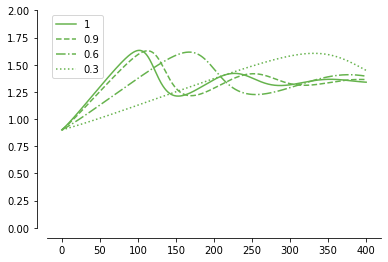

In [52]:
fig,ax = plt.subplots()


ax.plot(T,SS[0], color = (0.4,0.7,0.3),label='1')
ax.plot(T,SS[1], ls='--', color = (0.4,0.7,0.3),label='0.9')
ax.plot(T,SS[2], ls='-.', color = (0.4,0.7,0.3),label='0.6')
ax.plot(T,SS[3], ls=':', color = (0.4,0.7,0.3),label='0.3')
#ax.plot(T,It)
#ax.plot(T,Rt)
#ax.set_title(u"SIRS Fractional Model")
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
ax.set_ylim([0,2])
ax.legend(framealpha=1)
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend()#loc="upper left", bbox_to_anchor=(0.8,0.2))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.savefig('AB-S3.png')
plt.show()

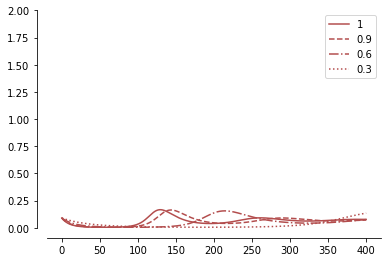

In [53]:
fig,ax = plt.subplots()

ax.plot(T,II[0], color = (0.7,0.3,0.3),label='1')
ax.plot(T,II[1],ls='--', color = (0.7,0.3,0.3),label='0.9')
ax.plot(T,II[2],ls='-.', color = (0.7,0.3,0.3),label='0.6')
ax.plot(T,II[3],ls=':', color = (0.7,0.3,0.3), label='0.3')
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
ax.set_ylim([0,2])
ax.legend(framealpha=1)
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend()#loc="upper left", bbox_to_anchor=(0.8,0.2))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.savefig('AB-I3.png')
plt.show()

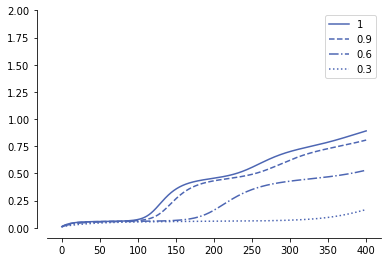

In [54]:
fig,ax = plt.subplots()

ax.plot(T,RR[0], color = (0.3,0.4,0.7),label='1')
ax.plot(T,RR[1],ls='--', color = (0.3,0.4,0.7),label='0.9')
ax.plot(T,RR[2],ls='-.', color = (0.3,0.4,0.7),label='0.6')
ax.plot(T,RR[3],ls=':', color = (0.3,0.4,0.7), label='0.3')
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
ax.set_ylim([0,2])
ax.legend(framealpha=1)
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend()#loc="upper left", bbox_to_anchor=(0.8,0.2))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.savefig('AB-R3.png')
plt.show()

In [33]:
print(s,i,r)

1.7991770700638856 0 1.4555594380963264


In [34]:
print(So,Io,Ro)

1.8132820404932928 0.0560734106815528 0.280367053407764


In [14]:
AS = []
AI = []
AR = []

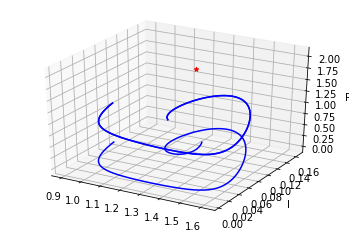

10.0


In [45]:
AS.append(SS[2])
AI.append(II[2])
AR.append(RR[2])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

n = len(AS)

for i in range(n):
  xs = AS[i]
  ys = AI[i]
  zs = AR[i]

  ax.plot(xs, ys, zs, c = 'b')


#ax.scatter([L/mu], [0], [0], c='r', marker=m)
#ax.scatter([1.8], [0.07], [2.0], c='r', marker='*')

#ax.scatter([L/mu], [0], [0], c='r', marker='*')
ax.scatter([So], [Io], [Ro], c='r', marker='*')
#ax.set_xlabel('S')
ax.set_ylabel('I')
ax.set_zlabel('R')
#ax.set_xlim([-4,4])
#ax.set_ylim([-4,4])
#ax.set_zlim([-4,4])
fig.savefig('fase3.png')
plt.show()

print(L/mu)

# Euler Method

In [19]:
# Fractional functions

def M(x):
        return 2./(2.-x)

def f(S,I):
        return k*I*S**q

def g1(S,I):
        return k*q*I*(S**(q-1))

def g2(S,I):
        return k*(S**q)



def c1(S,I,R):
        return -mu-g1(S,I)

def c2(S,I,R):
        return -g2(S,I) + gamma1

def c3(S,I,R):
        return g1(S,I)

def c4(S,I,R):
        return g2(S,I) - (mu + gamma1 + gamma2 + alpha)

c5 =  -mu - delta


def k1(S,I,R):
        return (M1*c2(S,I,R))/float(1-M1*c1(S,I,R))

def k2(S,I,R):
        return (M1*delta)/float(1-M1*c1(S,I,R))

def k3(S,I,R):
        return (M2*functionS(S,I,R))/float(1-M1*c1(S,I,R))

def k4(S,I,R):
        return (M1*c3(S,I,R))/float(1-M1*c4(S,I,R))

def k5(S,I,R):
        return (M2*functionI(S,I,R))/float(1-M1*c4(S,I,R))

def k6(S,I,R):
        return (M1*gamma2)/float(1-M1*c5)

def k7(S,I,R):
        return (M2*functionR(S,I,R))/float(1-M1*c5)


def dfunctionS(S,I,R):
        num = k1(S,I,R)*k5(S,I,R) + k2(S,I,R)*k5(S,I,R)*k6(S,I,R) + k2(S,I,R)*k7(S,I,R) + k3(S,I,R)
        den = 1 - k1(S,I,R)*k4(S,I,R) - k2(S,I,R)*k4(S,I,R)*k6(S,I,R)
        return num/float(den)

def dfunctionI(S,I,R):
        return k4(S,I,R)*dfunctionS(S,I,R) + k5(S,I,R)

def dfunctionR(S,I,R):
        return k6(S,I,R)*dfunctionI(S,I,R) + k7(S,I,R)


In [20]:
s = 0.9
i = 0.09
r = 0.01
t = 0

St = [s]
It = [i]
Rt = [r]
T  = [t]

for j in range(400000):

        t += h
        s1 = s + h*functionS(s,i,r)
        i1 = i + h*functionI(s,i,r)
        r1 = r + h*functionR(s,i,r)

        s = s1 + 0
        i = i1 + 0
        r = r1 + 0

        St.append(s)
        It.append(i)
        Rt.append(r)
        T.append(t)



In [21]:
sigma = 0.9

M1 = (2*(1-sigma))/float(M(sigma)*(2-sigma))

M2 = (2*sigma)/float((2-sigma)*M(sigma))

s = 0.9
i = 0.09
r = 0.01
t = 0

St2 = [s]
It2 = [i]
Rt2 = [r]
T2  = [t]

for j in range(400000):

        t += h
        s1 = s + h*dfunctionS(s,i,r)
        i1 = i + h*dfunctionI(s,i,r)
        r1 = r + h*dfunctionR(s,i,r)

        s = s1 + 0
        i = i1 + 0
        r = r1 + 0

        St2.append(s)
        It2.append(i)
        Rt2.append(r)
        T2.append(t)    

In [22]:
sigma = 0.6

M1 = (2*(1-sigma))/float(M(sigma)*(2-sigma))

M2 = (2*sigma)/float((2-sigma)*M(sigma))



s = 0.9
i = 0.09
r = 0.01
t = 0

St3 = [s]
It3 = [i]
Rt3 = [r]
T3  = [t]

for j in range(400000):

        t += h
        s1 = s + h*dfunctionS(s,i,r)
        i1 = i + h*dfunctionI(s,i,r)
        r1 = r + h*dfunctionR(s,i,r)

        s = s1 + 0
        i = i1 + 0
        r = r1 + 0

        St3.append(s)
        It3.append(i)
        Rt3.append(r)
        T3.append(t)

In [23]:
sigma = 0.3

M1 = (2*(1-sigma))/float(M(sigma)*(2-sigma))

M2 = (2*sigma)/float((2-sigma)*M(sigma))


s = 0.9
i = 0.09
r = 0.01
t = 0

St4 = [s]
It4 = [i]
Rt4 = [r]
T4  = [t]

for j in range(400000):

        t += h
        s1 = s + h*dfunctionS(s,i,r)
        i1 = i + h*dfunctionI(s,i,r)
        r1 = r + h*dfunctionR(s,i,r)

        s = s1 + 0
        i = i1 + 0
        r = r1 + 0

        St4.append(s)
        It4.append(i)
        Rt4.append(r)
        T4.append(t)

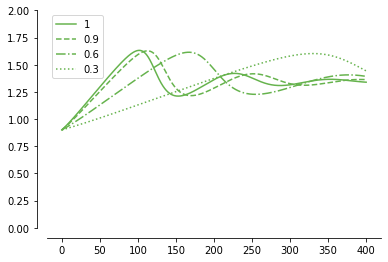

In [24]:
fig,ax = plt.subplots()

ax.plot(T,St, color = (0.4,0.7,0.3),label='1')
ax.plot(T,St2,ls='--', color = (0.4,0.7,0.3),label='0.9')
ax.plot(T,St3,ls='-.', color = (0.4,0.7,0.3),label='0.6')
ax.plot(T,St4,ls=':', color = (0.4,0.7,0.3), label='0.3')
#ax.plot(T,It)
#ax.plot(T,Rt)
#ax.set_title(u"SIRS Fractional Model")
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
ax.set_ylim([0,2])
ax.legend(framealpha=1)
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend()#loc="upper left", bbox_to_anchor=(0.8,0.2))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.savefig('S2.png')
plt.show()

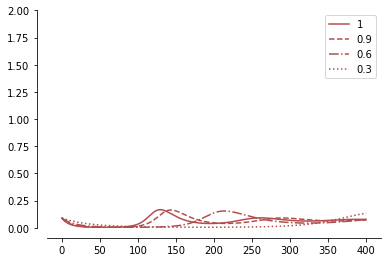

In [25]:
fig,ax = plt.subplots()

#print(It)

ax.plot(T,It, color = (0.7,0.3,0.3),label='1')
ax.plot(T,It2,ls='--', color = (0.7,0.3,0.3),label='0.9')
ax.plot(T,It3,ls='-.', color = (0.7,0.3,0.3),label='0.6')
ax.plot(T,It4,ls=':', color = (0.7,0.3,0.3), label='0.3')
#ax.plot(T,It)
#ax.plot(T,Rt)
#ax.set_title(u"SIRS Fractional Model")
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
ax.set_ylim([0,2])
ax.legend(framealpha=1)
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend()#loc="upper left", bbox_to_anchor=(0.8,0.2))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.savefig('I2.png')
plt.show()

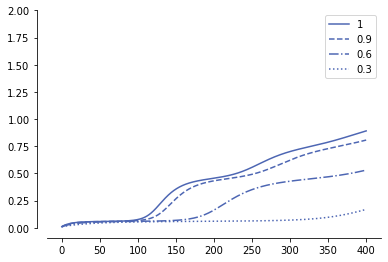

In [26]:
fig,ax = plt.subplots()

ax.plot(T,Rt, color = (0.3,0.4,0.7),label='1')
ax.plot(T,Rt2,ls='--', color = (0.3,0.4,0.7),label='0.9')
ax.plot(T,Rt3,ls='-.', color = (0.3,0.4,0.7),label='0.6')
ax.plot(T,Rt4,ls=':', color = (0.3,0.4,0.7), label='0.3')
#ax.plot(T,It)
#ax.plot(T,Rt)
#ax.set_title(u"SIRS Fractional Model")
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
ax.set_ylim([0,2])
ax.legend(framealpha=1)
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend()#loc="upper left", bbox_to_anchor=(0.8,0.2))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.savefig('R2.png')
plt.show()

In [55]:
StE1 = np.array(St)
StE2 = np.array(St2)
StE3 = np.array(St3)
StE4 = np.array(St4)


StA1 = np.array(SS[0])
StA2 = np.array(SS[1])
StA3 = np.array(SS[2])
StA4 = np.array(SS[3])

In [56]:
n1 = len(StE1)
print(abs(np.sum((StE1-StA1)**2)/n1))
print(abs(np.sum((StE2-StA2)**2)/n1))
print(abs(np.sum((StE3-StA3)**2)/n1))
print(abs(np.sum((StE4-StA4)**2)/n1))

print("_______________________")
print(max(StE1-StA1))
print(max(StE2-StA2))
print(max(StE3-StA3))
print(max(StE4-StA4))

print("_______________________")
print(abs(np.sum((StE1-StA1))/n1))
print(abs(np.sum((StE2-StA2))/n1))
print(abs(np.sum((StE3-StA3))/n1))
print(abs(np.sum((StE4-StA4))/n1))

0.05517982679031242
1.0857079100279284e-07
1.917410464065221e-06
5.176306389519657e-06
_______________________
0.26630460492318964
0.0005220580720304291
0.0019217974147149874
0.0018680751456927602
_______________________
0.009522107548267123
2.455136115336857e-05
0.00011510608452566932
0.00019710119390415723


No handles with labels found to put in legend.
No handles with labels found to put in legend.


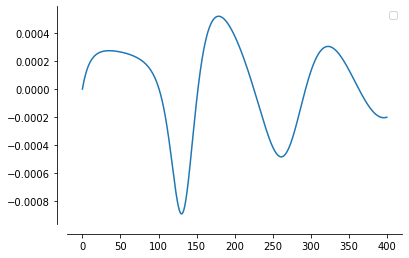

In [57]:
fig,ax = plt.subplots()
ax.plot(T,StE2-StA2)
#ax.plot(T,St, color = (0.4,0.7,0.3),label='1')
#ax.plot(T,St2,ls='--', color = (0.4,0.7,0.3),label='0.9')
#ax.plot(T,St3,ls='-.', color = (0.4,0.7,0.3),label='0.6')
#ax.plot(T,St4,ls=':', color = (0.4,0.7,0.3), label='0.3')
#ax.plot(T,It)
#ax.plot(T,Rt)
#ax.set_title(u"SIRS Fractional Model")
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
#ax.set_ylim([0,1])
ax.legend(framealpha=1)
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend()#loc="upper left", bbox_to_anchor=(0.8,0.2))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.savefig('diff-2.png')
plt.show()

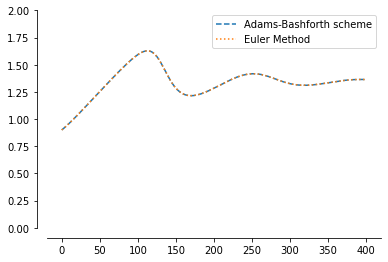

In [58]:
fig,ax = plt.subplots()

ax.plot(T,StA2,ls = "--", label = "Adams-Bashforth scheme")
ax.plot(T,StE2,ls = ":",label="Euler Method")
#ax.plot(T,St, color = (0.4,0.7,0.3),label='1')
#ax.plot(T,St2,ls='--', color = (0.4,0.7,0.3),label='0.9')
#ax.plot(T,St3,ls='-.', color = (0.4,0.7,0.3),label='0.6')
#ax.plot(T,St4,ls=':', color = (0.4,0.7,0.3), label='0.3')
#ax.plot(T,It)
#ax.plot(T,Rt)
#ax.set_title(u"SIRS Fractional Model")
ax.spines['left'].set_position(('outward',10))
ax.spines['bottom'].set_position(('outward',10))
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#ax.set_yticks(range(10),minor=True)
ax.set_ylim([0,2])
ax.legend(framealpha=1)
#ax.legend(bbox_to_anchor=(1.1, 1.05))
ax.legend()#loc="upper left", bbox_to_anchor=(0.8,0.2))
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
fig.savefig('compare-2.png')
plt.show()

# Asymptotic Stability

In [1]:
from sympy import*

In [ ]:
mu, k,g,g2, delta,gamma1,gamma2,alpha,sigma = symbols('mu, k,g,g2, delta,gamma1,gamma2,alpha,sigma')

In [ ]:
J = Matrix([ [-mu, -k*g + gamma1,delta],[k*g2,k*g-mu - gamma1-gamma2 - alpha,0],[0,gamma2,-mu-delta]])

In [ ]:
J = Matrix([ [-mu, -k*g + gamma1,delta],[k*g2,0,0],[0,gamma2,-mu-delta]])

In [2]:
a1,a2,a3,a4,a5,a6,a7,sigma = symbols('a1,a2,a3,a4,a5,a6,a7,sigma')

In [3]:
J = Matrix([ [-a1, -a2,a3],[a4,a5,0],[0,a6,-a7]])

In [4]:
deter = (eye(3)-(1-sigma)*J).det()
print(deter)

a1*a5*a7*sigma**3 - 3*a1*a5*a7*sigma**2 + 3*a1*a5*a7*sigma - a1*a5*a7 - a1*a5*sigma**2 + 2*a1*a5*sigma - a1*a5 + a1*a7*sigma**2 - 2*a1*a7*sigma + a1*a7 - a1*sigma + a1 - a2*a4*a7*sigma**3 + 3*a2*a4*a7*sigma**2 - 3*a2*a4*a7*sigma + a2*a4*a7 + a2*a4*sigma**2 - 2*a2*a4*sigma + a2*a4 + a3*a4*a6*sigma**3 - 3*a3*a4*a6*sigma**2 + 3*a3*a4*a6*sigma - a3*a4*a6 - a5*a7*sigma**2 + 2*a5*a7*sigma - a5*a7 + a5*sigma - a5 - a7*sigma + a7 + 1


In [5]:
s = symbols('s')
M = s*(eye(3)-(1-sigma)*J)-sigma*J
print(M)

Matrix([[a1*sigma + s*(a1*(1 - sigma) + 1), a2*s*(1 - sigma) + a2*sigma, -a3*s*(1 - sigma) - a3*sigma], [-a4*s*(1 - sigma) - a4*sigma, -a5*sigma + s*(-a5*(1 - sigma) + 1), 0], [0, -a6*s*(1 - sigma) - a6*sigma, a7*sigma + s*(a7*(1 - sigma) + 1)]])


In [6]:
det2 = M.det()
print(det2)

a1*a5*a7*s**3*sigma**3 - 3*a1*a5*a7*s**3*sigma**2 + 3*a1*a5*a7*s**3*sigma - a1*a5*a7*s**3 - 3*a1*a5*a7*s**2*sigma**3 + 6*a1*a5*a7*s**2*sigma**2 - 3*a1*a5*a7*s**2*sigma + 3*a1*a5*a7*s*sigma**3 - 3*a1*a5*a7*s*sigma**2 - a1*a5*a7*sigma**3 - a1*a5*s**3*sigma**2 + 2*a1*a5*s**3*sigma - a1*a5*s**3 + 2*a1*a5*s**2*sigma**2 - 2*a1*a5*s**2*sigma - a1*a5*s*sigma**2 + a1*a7*s**3*sigma**2 - 2*a1*a7*s**3*sigma + a1*a7*s**3 - 2*a1*a7*s**2*sigma**2 + 2*a1*a7*s**2*sigma + a1*a7*s*sigma**2 - a1*s**3*sigma + a1*s**3 + a1*s**2*sigma - a2*a4*a7*s**3*sigma**3 + 3*a2*a4*a7*s**3*sigma**2 - 3*a2*a4*a7*s**3*sigma + a2*a4*a7*s**3 + 3*a2*a4*a7*s**2*sigma**3 - 6*a2*a4*a7*s**2*sigma**2 + 3*a2*a4*a7*s**2*sigma - 3*a2*a4*a7*s*sigma**3 + 3*a2*a4*a7*s*sigma**2 + a2*a4*a7*sigma**3 + a2*a4*s**3*sigma**2 - 2*a2*a4*s**3*sigma + a2*a4*s**3 - 2*a2*a4*s**2*sigma**2 + 2*a2*a4*s**2*sigma + a2*a4*s*sigma**2 + a3*a4*a6*s**3*sigma**3 - 3*a3*a4*a6*s**3*sigma**2 + 3*a3*a4*a6*s**3*sigma - a3*a4*a6*s**3 - 3*a3*a4*a6*s**2*sigma**3 + 6*a

In [ ]:
solu = solve(det2,s)
print(solu)

[-(-3*(3*delta*g*g2*k**2*sigma**3 - 3*delta*g*g2*k**2*sigma**2 - 3*delta*g2*gamma1*k*sigma**3 + 3*delta*g2*gamma1*k*sigma**2 - 3*delta*g2*gamma2*k*sigma**3 + 3*delta*g2*gamma2*k*sigma**2 - delta*mu*sigma**2 + 3*g*g2*k**2*mu*sigma**3 - 3*g*g2*k**2*mu*sigma**2 - g*g2*k**2*sigma**2 - 3*g2*gamma1*k*mu*sigma**3 + 3*g2*gamma1*k*mu*sigma**2 + g2*gamma1*k*sigma**2 - mu**2*sigma**2)/(delta*g*g2*k**2*sigma**3 - 3*delta*g*g2*k**2*sigma**2 + 3*delta*g*g2*k**2*sigma - delta*g*g2*k**2 - delta*g2*gamma1*k*sigma**3 + 3*delta*g2*gamma1*k*sigma**2 - 3*delta*g2*gamma1*k*sigma + delta*g2*gamma1*k - delta*g2*gamma2*k*sigma**3 + 3*delta*g2*gamma2*k*sigma**2 - 3*delta*g2*gamma2*k*sigma + delta*g2*gamma2*k - delta*mu*sigma**2 + 2*delta*mu*sigma - delta*mu + delta*sigma - delta + g*g2*k**2*mu*sigma**3 - 3*g*g2*k**2*mu*sigma**2 + 3*g*g2*k**2*mu*sigma - g*g2*k**2*mu - g*g2*k**2*sigma**2 + 2*g*g2*k**2*sigma - g*g2*k**2 - g2*gamma1*k*mu*sigma**3 + 3*g2*gamma1*k*mu*sigma**2 - 3*g2*gamma1*k*mu*sigma + g2*gamma1*k*mu

In [10]:
pol = Poly(det2,s)
co = pol.coeffs()
print(co[3])

-a1*a5*a7*sigma**3 + a2*a4*a7*sigma**3 - a3*a4*a6*sigma**3


In [ ]:
solu3 = solve(a1*s**3 + a2*s**2 + a3*s + a4,s)
print(solu3[1])

-(-3*a3/a1 + a2**2/a1**2)/(3*(-1/2 - sqrt(3)*I/2)*(sqrt(-4*(-3*a3/a1 + a2**2/a1**2)**3 + (27*a4/a1 - 9*a2*a3/a1**2 + 2*a2**3/a1**3)**2)/2 + 27*a4/(2*a1) - 9*a2*a3/(2*a1**2) + a2**3/a1**3)**(1/3)) - (-1/2 - sqrt(3)*I/2)*(sqrt(-4*(-3*a3/a1 + a2**2/a1**2)**3 + (27*a4/a1 - 9*a2*a3/a1**2 + 2*a2**3/a1**3)**2)/2 + 27*a4/(2*a1) - 9*a2*a3/(2*a1**2) + a2**3/a1**3)**(1/3)/3 - a2/(3*a1)


In [ ]:
s1 = solu[0]
print(s1)

-(-3*(a1*a7*sigma**2 - 3*a2*a4*a7*sigma**3 + 3*a2*a4*a7*sigma**2 + a2*a4*sigma**2 + 3*a3*a4*a6*sigma**3 - 3*a3*a4*a6*sigma**2)/(a1*a7*sigma**2 - 2*a1*a7*sigma + a1*a7 - a1*sigma + a1 - a2*a4*a7*sigma**3 + 3*a2*a4*a7*sigma**2 - 3*a2*a4*a7*sigma + a2*a4*a7 + a2*a4*sigma**2 - 2*a2*a4*sigma + a2*a4 + a3*a4*a6*sigma**3 - 3*a3*a4*a6*sigma**2 + 3*a3*a4*a6*sigma - a3*a4*a6 - a7*sigma + a7 + 1) + (-2*a1*a7*sigma**2 + 2*a1*a7*sigma + a1*sigma + 3*a2*a4*a7*sigma**3 - 6*a2*a4*a7*sigma**2 + 3*a2*a4*a7*sigma - 2*a2*a4*sigma**2 + 2*a2*a4*sigma - 3*a3*a4*a6*sigma**3 + 6*a3*a4*a6*sigma**2 - 3*a3*a4*a6*sigma + a7*sigma)**2/(a1*a7*sigma**2 - 2*a1*a7*sigma + a1*a7 - a1*sigma + a1 - a2*a4*a7*sigma**3 + 3*a2*a4*a7*sigma**2 - 3*a2*a4*a7*sigma + a2*a4*a7 + a2*a4*sigma**2 - 2*a2*a4*sigma + a2*a4 + a3*a4*a6*sigma**3 - 3*a3*a4*a6*sigma**2 + 3*a3*a4*a6*sigma - a3*a4*a6 - a7*sigma + a7 + 1)**2)/(3*(27*(a2*a4*a7*sigma**3 - a3*a4*a6*sigma**3)/(2*(a1*a7*sigma**2 - 2*a1*a7*sigma + a1*a7 - a1*sigma + a1 - a2*a4*a7*sigm

In [ ]:
s2 = solu[1]
print(s2)

-(-3*(a1*a7*sigma**2 - 3*a2*a4*a7*sigma**3 + 3*a2*a4*a7*sigma**2 + a2*a4*sigma**2 + 3*a3*a4*a6*sigma**3 - 3*a3*a4*a6*sigma**2)/(a1*a7*sigma**2 - 2*a1*a7*sigma + a1*a7 - a1*sigma + a1 - a2*a4*a7*sigma**3 + 3*a2*a4*a7*sigma**2 - 3*a2*a4*a7*sigma + a2*a4*a7 + a2*a4*sigma**2 - 2*a2*a4*sigma + a2*a4 + a3*a4*a6*sigma**3 - 3*a3*a4*a6*sigma**2 + 3*a3*a4*a6*sigma - a3*a4*a6 - a7*sigma + a7 + 1) + (-2*a1*a7*sigma**2 + 2*a1*a7*sigma + a1*sigma + 3*a2*a4*a7*sigma**3 - 6*a2*a4*a7*sigma**2 + 3*a2*a4*a7*sigma - 2*a2*a4*sigma**2 + 2*a2*a4*sigma - 3*a3*a4*a6*sigma**3 + 6*a3*a4*a6*sigma**2 - 3*a3*a4*a6*sigma + a7*sigma)**2/(a1*a7*sigma**2 - 2*a1*a7*sigma + a1*a7 - a1*sigma + a1 - a2*a4*a7*sigma**3 + 3*a2*a4*a7*sigma**2 - 3*a2*a4*a7*sigma + a2*a4*a7 + a2*a4*sigma**2 - 2*a2*a4*sigma + a2*a4 + a3*a4*a6*sigma**3 - 3*a3*a4*a6*sigma**2 + 3*a3*a4*a6*sigma - a3*a4*a6 - a7*sigma + a7 + 1)**2)/(3*(-1/2 - sqrt(3)*I/2)*(27*(a2*a4*a7*sigma**3 - a3*a4*a6*sigma**3)/(2*(a1*a7*sigma**2 - 2*a1*a7*sigma + a1*a7 - a1*sigma

In [ ]:
s3 = solu[2]
print(s3)

-(-3*(a1*a7*sigma**2 - 3*a2*a4*a7*sigma**3 + 3*a2*a4*a7*sigma**2 + a2*a4*sigma**2 + 3*a3*a4*a6*sigma**3 - 3*a3*a4*a6*sigma**2)/(a1*a7*sigma**2 - 2*a1*a7*sigma + a1*a7 - a1*sigma + a1 - a2*a4*a7*sigma**3 + 3*a2*a4*a7*sigma**2 - 3*a2*a4*a7*sigma + a2*a4*a7 + a2*a4*sigma**2 - 2*a2*a4*sigma + a2*a4 + a3*a4*a6*sigma**3 - 3*a3*a4*a6*sigma**2 + 3*a3*a4*a6*sigma - a3*a4*a6 - a7*sigma + a7 + 1) + (-2*a1*a7*sigma**2 + 2*a1*a7*sigma + a1*sigma + 3*a2*a4*a7*sigma**3 - 6*a2*a4*a7*sigma**2 + 3*a2*a4*a7*sigma - 2*a2*a4*sigma**2 + 2*a2*a4*sigma - 3*a3*a4*a6*sigma**3 + 6*a3*a4*a6*sigma**2 - 3*a3*a4*a6*sigma + a7*sigma)**2/(a1*a7*sigma**2 - 2*a1*a7*sigma + a1*a7 - a1*sigma + a1 - a2*a4*a7*sigma**3 + 3*a2*a4*a7*sigma**2 - 3*a2*a4*a7*sigma + a2*a4*a7 + a2*a4*sigma**2 - 2*a2*a4*sigma + a2*a4 + a3*a4*a6*sigma**3 - 3*a3*a4*a6*sigma**2 + 3*a3*a4*a6*sigma - a3*a4*a6 - a7*sigma + a7 + 1)**2)/(3*(-1/2 + sqrt(3)*I/2)*(27*(a2*a4*a7*sigma**3 - a3*a4*a6*sigma**3)/(2*(a1*a7*sigma**2 - 2*a1*a7*sigma + a1*a7 - a1*sigma